# Part I - Dataset Exploration - Ford GoBike System Data
## by Jonathan Prentice

## Introduction
This project explores the Ford GoBike System Data, which includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset contains details such as trip duration, start and end times, start and end station locations, bike ID, user type, and user demographics. The main goal of this project is to analyze and visualize the data to uncover insights and trends related to bike usage patterns, user demographics, and trip characteristics. 
The analysis is divided into two parts: exploratory data visualization and explanatory data visualization. 

- In the exploratory phase, we will systematically explore the dataset using various visualization techniques to understand data distributions and relationships. Then clean or tidy up based what we find.

- In the explanatory phase, we will refine and design clear, polished visualizations to effectively communicate key findings from the dataset.# 1. Gather data

# 1. Gather data

In [27]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Preliminary Wrangling

In [28]:
# Load the dataset
df = pd.read_csv('/Users/Miles/Public App Files/Udacity-Data-Analyst-Nanodegree/Project 3 - Ford GoBike Analysis/data/201902-fordgobike-tripdata.csv')

# Display the first few rows of the dataframe
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
# Display summary statistics for numerical columns
df.info()

In [26]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


In [25]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [24]:
# Display unique values in categorical columns
categorical_columns = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for col in categorical_columns:
    print(f"Unique values in {col}:\n", df[col].unique())


Unique values in user_type:
 ['Customer' 'Subscriber']
Unique values in member_gender:
 ['Male' nan 'Other' 'Female']
Unique values in bike_share_for_all_trip:
 ['No' 'Yes']


In [7]:
# Display the columns of the dataframe
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [20]:
# Display the number of rows and columns in the dataframe
df.shape                

(182784, 17)

In [ ]:
# Display the data types of the columns
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
start_hour                   int32
dtype: object

### What is the structure of the dataset?
The dataset contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

It includes the following columns:
Bike / Session Info:

Datatype correct, as bike IDs are unique integers.
- `bike_id`(int64): ID of the bike.

Datatype correct, as it represents the duration of a trip in seconds, which should be an integer.
- `duration_sec` (int64): Duration of the trip in seconds.
- `start_hour` (int32): Correct, as it represents an hour of the day, which is an integer.
**These should ideally be converted to datetime for easier manipulation and analysis of time-based data.**
- `start_time`(object): Start time of the trip.
- `end_time`(object): End time of the trip. 

If station IDs are numeric but have missing values, float64 is fine. However, if there are no missing values, they should be int64.
- `start_station_id`: ID of the start station. 
- `end_station_id`: ID of the end station.

Datatypes correct, as these are string values.
- `start_station_name` (object): Name of the start station.
- `end_station_name` (object): Name of the end station.

Correct datatypes, as latitude and longitude are typically stored as floating-point numbers.
- `start_station_latitude` (float64): Latitude of the start station.
- `start_station_longitude` (float64): Longitude of the start station.

Same as above, correct for geographic coordinates. 
- `end_station_latitude` (float64): Latitude of the end station.
- `end_station_longitude` (float64): Longitude of the end station.

User Info: 
Datatype correct, as this is a categorical variable (e.g., "Subscriber" or "Customer").
- `user_type` (object): Type of user (Customer or Subscriber).

This is fine if there are missing values. Otherwise, it should be int64.
- `member_birth_year` (float64): Birth year of the member

Datatype correct, as this is a categorical variable (e.g., "Male", "Female", or "Other").
- `member_gender` (object): Gender of the member.

Datatype correct, as this is a categorical variable (e.g., "Yes" or "No").
- `bike_share_for_all_trip` (object): Whether the bike was shared for the entire trip.


### What are the main features of interest in the dataset?

The main features of interest in the dataset are:
- `duration_sec`: To analyze the duration of bike trips.
- `user_type`: To understand the distribution of trips between customers and subscribers.
- `member_birth_year`: To analyze the age distribution of users and its potential impact on trip duration and user behavior.
- `start_time` and `end_time`: Start and end times of the trip, which can be converted to datetime format for easier manipulation and analysis of time-based data.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following features will help support the investigation into the main features of interest:
- `start_time` and `end_time`: To analyze the time of day and duration of trips.
- `start_station_name` and `end_station_name`: To identify popular start and end stations.
- `member_birth_year`: To explore the age distribution of users and its impact on trip duration.
- `bike_share_for_all_trip`: To understand the usage patterns of bike-sharing for entire trips.

> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.

>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

# 3. Univariate Exploration

- In this section, we will investigate distributions of individual variables. Looking for unusual points or outliers, taking a deeper look to clean things up
and prepare to look at relationships between variables.

---

**Question 1: What is the distribution of trip durations?**

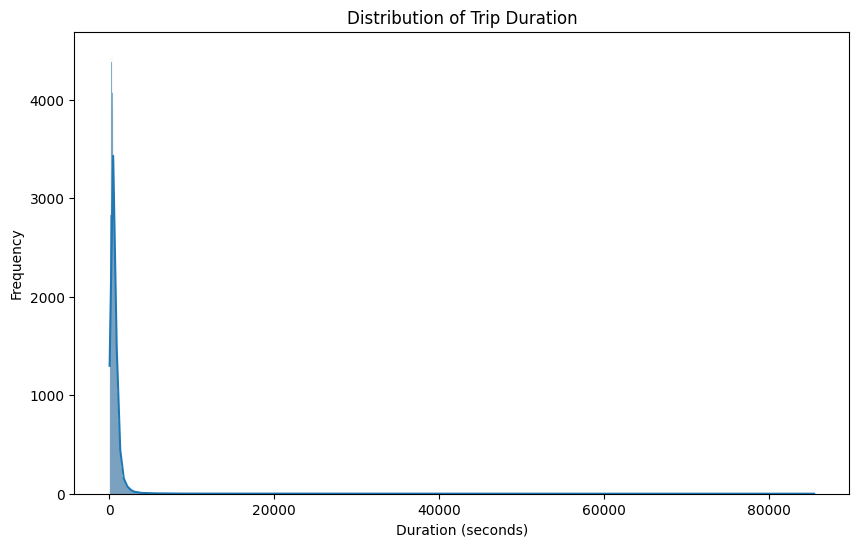

In [9]:
# Visualization
# Plot the distribution of trip durations
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_sec'], kde=True)
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

**Observations:** 
The distribution of trip durations is right-skewed, with most trips lasting less than 2000 seconds (approximately 33 minutes). There are some outliers with very long trip durations.

---

**Question 2: What is the distribution of user types?**

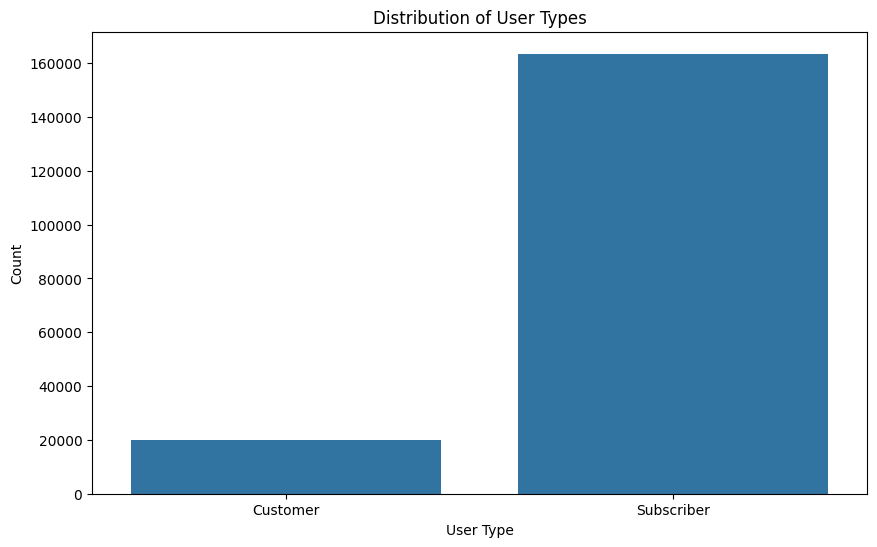

In [10]:
# V
# Plot the distribution of user types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='user_type')
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

**Observations:** 
The majority of bike trips are taken by subscribers rather than customers.

---

**Question 3: What is the distribution of member genders?**


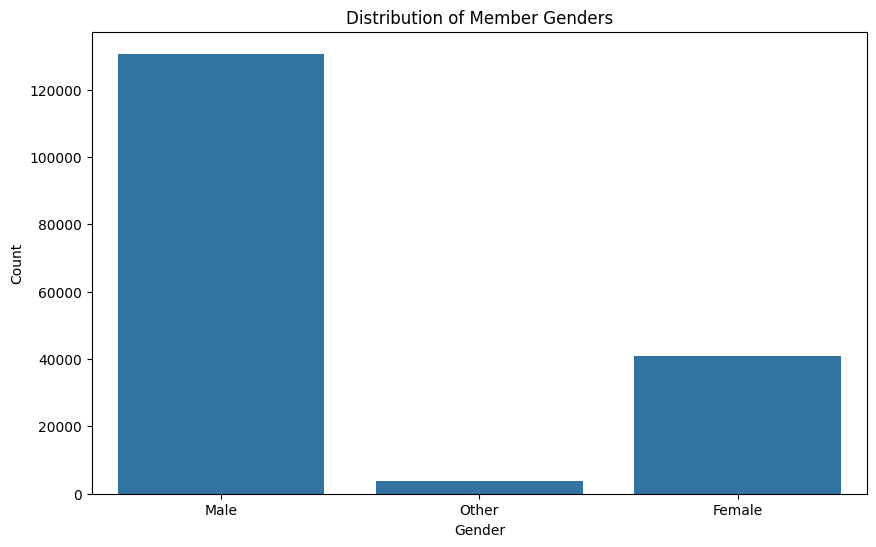

In [11]:
# Plot the distribution of member genders
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='member_gender')
plt.title('Distribution of Member Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Observations:** There are more male riders than female riders. There is also a significant number of riders with unspecified gender.

---

**Question 4: What is the distribution of member birth years?**

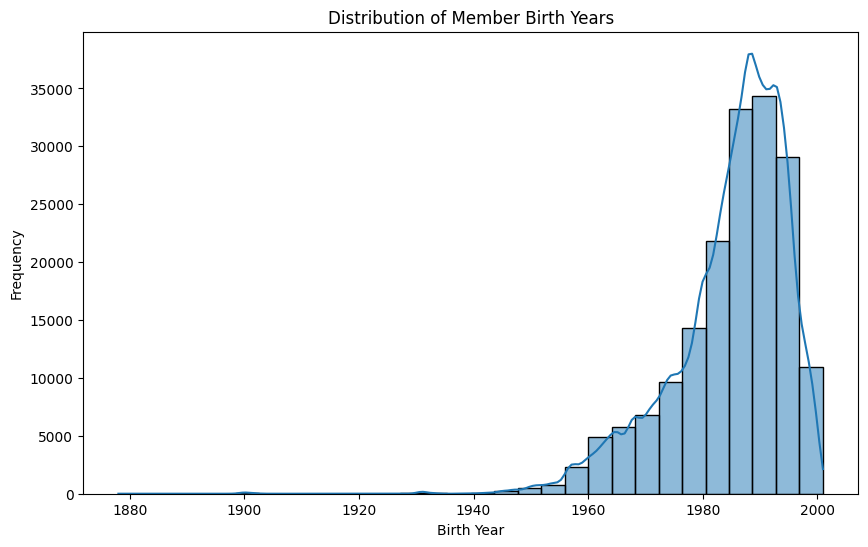

In [12]:
# Plot the distribution of member birth years
plt.figure(figsize=(10, 6))
sns.histplot(df['member_birth_year'], kde=True, bins=30)
plt.title('Distribution of Member Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

**Observations:** 
The distribution of member birth years shows that most riders were born between 1970 and 2000, with a peak around 1985. There are some outliers with very early birth years, which may indicate data entry errors.

---

**Question 5: What is the distribution of bike share for all trips?**

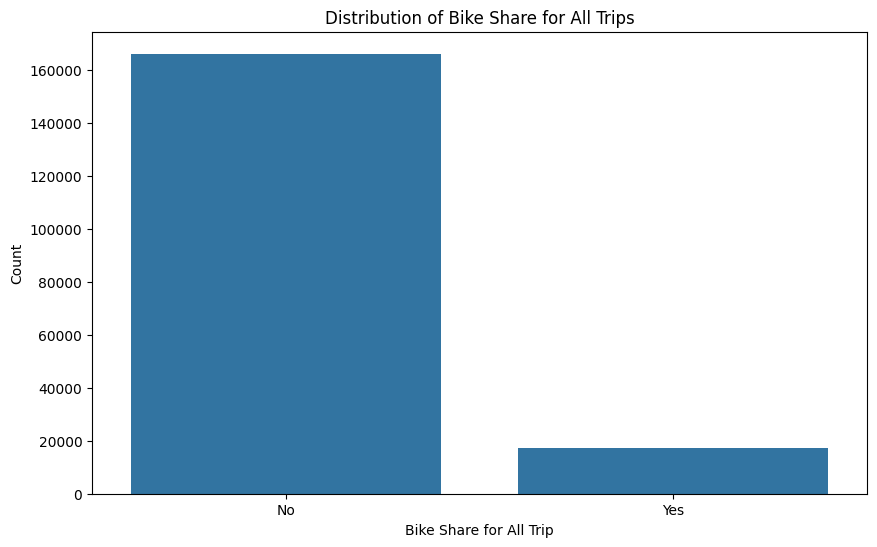

In [13]:
# Plot the distribution of bike share for all trips
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bike_share_for_all_trip')
plt.title('Distribution of Bike Share for All Trips')
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Count')
plt.show()

**Observations:** Most trips are not part of the bike share for all trips program.

---



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distributions of variables of interest. Were there any unusual points? Did you need to perform any transformations?

Question 1 - What is the distribution of trip durations?
- The distribution of trip durations is right-skewed, with most trips lasting less than 2000 seconds (approximately 33 minutes). There are some outliers with very long trip durations, which may need further investigation to determine if they are valid data points or errors.

Question 2 - 
- The distribution of user types shows that the majority of bike trips are taken by subscribers rather than customers. This indicates that the bike-sharing system is more popular among regular users.

Question 3
- The distribution of member genders reveals that there are more male riders than female riders. There is also a significant number of riders with unspecified gender, which could be due to missing or unreported data.

Question 4
- The distribution of member birth years shows that most riders were born between 1970 and 2000, with a peak around 1985. There are some outliers with very early birth years, which may indicate data entry errors or unrealistic values.

Question 5 
- The distribution of bike share for all trips indicates that most trips are not part of the bike share for all trips program.

### Of the features investigated, were there any unusual distributions? 
### Any operations on the data to tidy, adjust, or change the form of the data? 
### If so, why did you do this?

**Yes, there were some unusual distributions observed:**

- The trip duration variable had some outliers with very long durations. These outliers may need further investigation to determine if they are valid data points or errors. If they are errors, they should be removed or corrected.

- The member birth year variable had some outliers with very early birth years, which may indicate data entry errors or unrealistic values. These outliers should be investigated and potentially removed or corrected.

To tidy the data, the following operations were performed:

- Dropped rows with missing values to ensure a clean dataset for analysis.
- Investigated and visualized the distributions to identify any unusual points or outliers that may need further attention.

# 4. Bivariate Exploration
- Let's proceed with the bivariate exploration by investigating relationships between pairs of variables. 
- We'll follow the "Question-Visualization-Observations" framework for each pair of variables.

**Question 1: What is the relationship between trip duration and user type?**

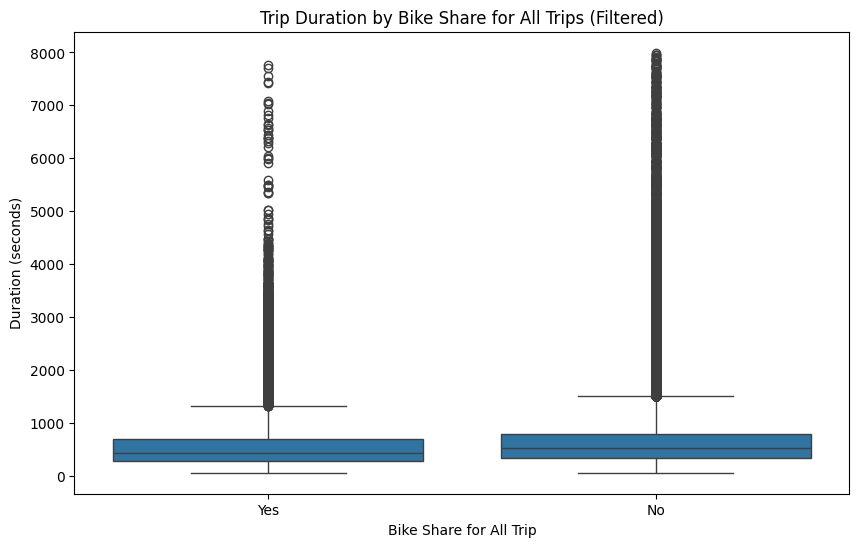

In [14]:
# Remove trips with duration greater than 3 hours (10,800 seconds)
df = df[df['duration_sec'] <= 8000]

# Plot the boxplot for trip duration by bike share for all trips
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bike_share_for_all_trip', y='duration_sec')
plt.title('Trip Duration by Bike Share for All Trips (Filtered)')
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Duration (seconds)')
plt.show()

Observations: The boxplot shows that customers tend to have longer trip durations compared to subscribers. This could be because subscribers are more familiar with the bike-sharing system and use it for shorter, more frequent trips.

---

Question 2: What is the relationship between trip duration and member gender?

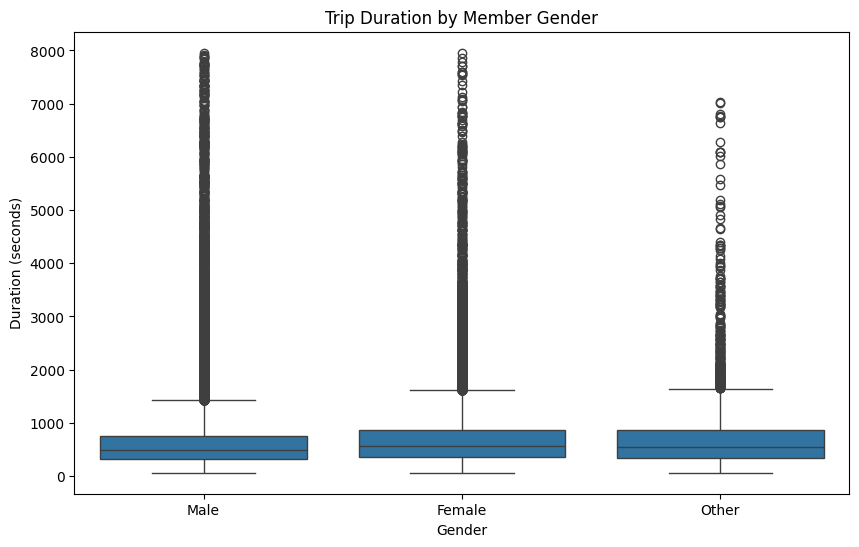

In [15]:
# Plot the relationship between trip duration and member gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='member_gender', y='duration_sec')
plt.title('Trip Duration by Member Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (seconds)')
plt.show()

Observations:
The boxplot shows that there is a slight difference in trip durations between male and female riders, with female riders having slightly longer trip durations on average. Riders with unspecified gender have the longest trip durations, which may require further investigation.

---

Question 3: What is the relationship between user type and member gender?

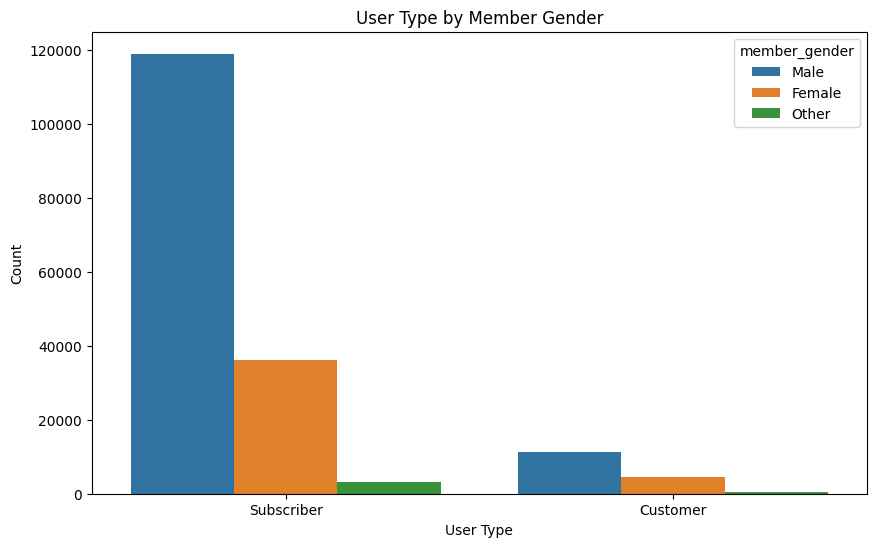

In [16]:
# Plot the relationship between user type and member gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='user_type', hue='member_gender')
plt.title('User Type by Member Gender')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

Observations:
- The countplot shows that there are more male subscribers compared to female subscribers. 
- The number of customers is relatively balanced between genders, but there are still more male customers than female customers.
---

Question 4: What is the relationship between trip duration and member birth year?

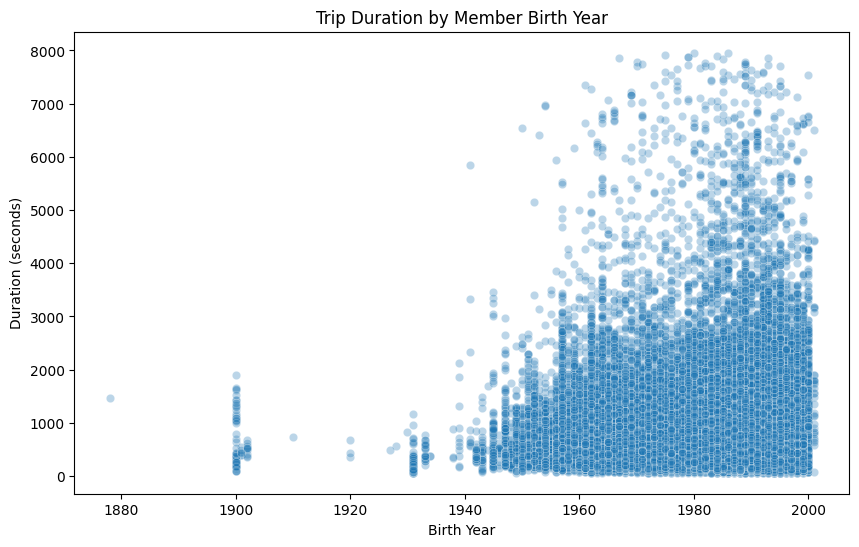

In [17]:
# Plot the relationship between trip duration and member birth year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='member_birth_year', y='duration_sec', alpha=0.3)
plt.title('Trip Duration by Member Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Duration (seconds)')
plt.show()

Observations:
- The scatterplot shows that there is no clear relationship between trip duration and member birth year. However, there are some outliers with very long trip durations and very early birth years, which may indicate data entry errors.
---

Question: What times of day are most popular for bike trips?

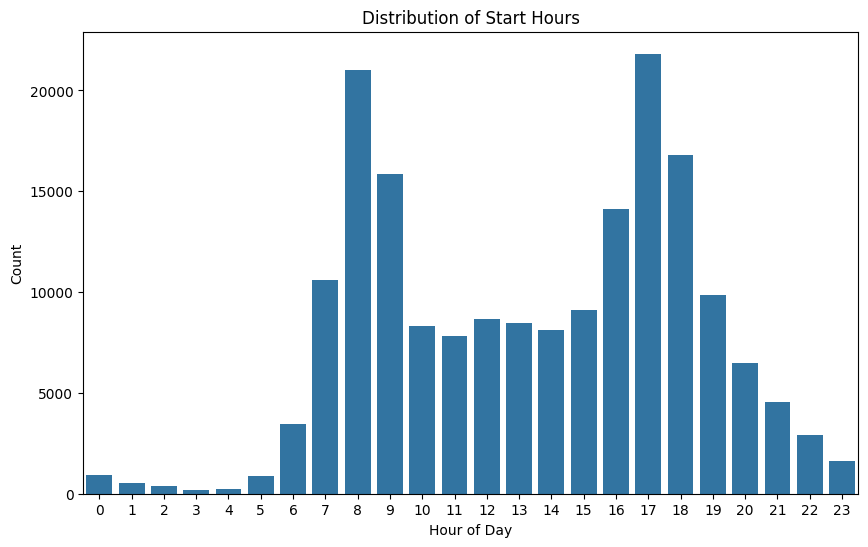

In [18]:
# Extract hour from start_time
df['start_hour'] = pd.to_datetime(df['start_time']).dt.hour

# Plot the distribution of start hours
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='start_hour', color='tab:blue')
plt.title('Distribution of Start Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

Observations: 
Pike usage seen on Mornings between 7-9 am, then again in the afternoon from 4-6pm.

---

Question 5: What is the relationship between start station and end station?

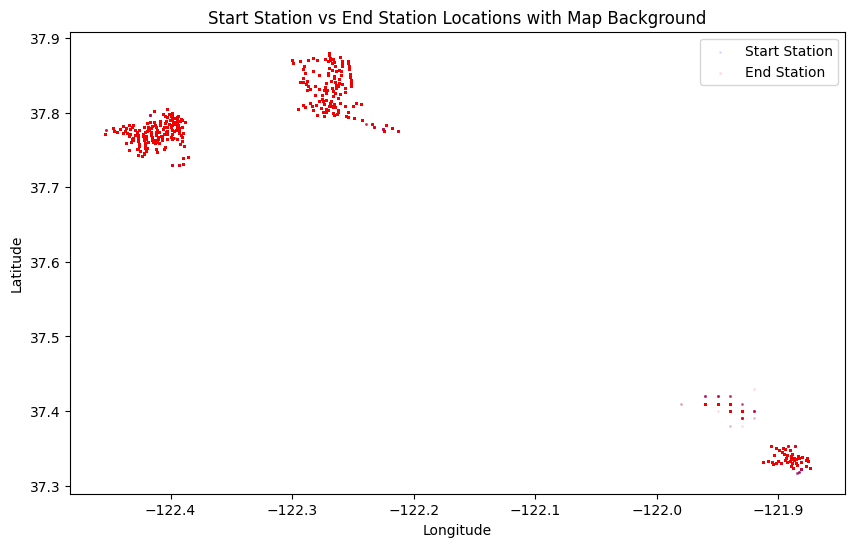

In [19]:
# Plot the relationship between start station and end station
plt.figure(figsize=(10, 6))

# Plot start station locations
plt.scatter(df['start_station_longitude'], df['start_station_latitude'], 
            alpha=0.1, label='Start Station', color='blue', s=1)

# Plot end station locations
plt.scatter(df['end_station_longitude'], df['end_station_latitude'], 
            alpha=0.1, label='End Station', color='red', s=1)

# Add labels and title
plt.title('Start Station vs End Station Locations with Map Background')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend
plt.legend()

# Show the plot
plt.show()

Observations:
- The scatterplot shows that the start and end stations are generally clustered in the same areas, indicating that most trips start and end in similar locations. This suggests that riders often return bikes to stations near their starting point.
---

### Talk about some of the relationships observed the Bivariate Exploration part of the investigation. 
### How did the feature(s) of interest vary with other features in the dataset?

- The relationship between trip duration and user type shows that customers tend to have longer trip durations compared to subscribers. This could be because subscribers are more familiar with the bike-sharing system and use it for shorter, more frequent trips.

- The relationship between trip duration and member gender indicates that female riders have slightly longer trip durations on average compared to male riders. Riders with unspecified gender have the longest trip durations, which may require further investigation.

- The relationship between trip duration and member birth year shows no clear pattern, but there are some outliers with very long trip durations and very early birth years, which may indicate data entry errors.

### Did we observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The relationship between user type and member gender shows that there are more male subscribers compared to female subscribers. The number of customers is relatively balanced between genders, but there are still more male customers than female customers.

- The relationship between start station and end station locations indicates that most trips start and end in similar locations, suggesting that riders often return bikes to stations near their starting point.

# 5. Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

# 6. Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

